# Data manipulation for establishing meander wavelength to discharge relationship 

In [9]:
#import packages 
import data_methods as dm
import vis_methods as vm 
import os 
import pandas as pd

In [10]:
#file paths 
ra_path = r'D:\CDS River Discharge\Pickles\river_analytics.pickle' #40 year annual GFAS mean/max/min 
compressed_discharge_path = r'D:\CDS River Discharge\Pickles\compressed_ra.pickle' #compressed version of above file 

#Frasson data directory 
frasson_dir = r'C:\Users\bydd1\OneDrive\Documents\Research\MS Sinuosity Data'

frasson_path = os.path.join(frasson_dir, 'MS_segments_recovered.xlsx') #Frasson file 
#frasson_path = os.path.join(frasson_dir, 'Amazon Segments\Seg1.xlsx')
#segmented_frasson_path = r'C:\Users\bydd1\OneDrive\Documents\Research\MS Sinuosity Data\Amazon Segments\Seg1_mean_dis.xlsx'
segmented_frasson_path = r'C:\Users\bydd1\OneDrive\Documents\Research\MS Sinuosity Data\MS_segments_averaged_by_seg.xlsx' #Frasson, averaged by segment

## Data inputs
This program relies on two data products
- river_analytics.pickle : a pickle file containing 40 year annual values of mean/max/min discharge from GFAS generated by the copernicus_data_extraction.py script
- MS_segments.xlsx : data products from the Frasson et al paper

## Generate compressed version of river_analytics.pickle
river_analytics.pickle is computationally difficult to handle due to its large size (5GB, thanks 0.1degx0.1deg res), so we average it temporally across all years to generate compressed_ra.pickle 
This will print how long it takes (84 seconds on Brynn's laptop)

In [11]:
dm.compress_ra(ra_path, compressed_discharge_path) 

--- 118.30109977722168 seconds ---


## Add mean_dis, max_dis, and min_dis (and natural logged values) to Frasson file
This method reads the Frasson file, and then iterates through every lat/lon pair, finds the nearest neighbor within the compressed GFAS dataset generated above, and adds a column with mean/max/min data. 
Also adds columns for the natural log of meander wavelength, sinuosity, QWBM (Frasson's calculated discharge), and GFAS' mean/max/min. 
All columns with nan-values are also dropped here 

This will print a progress statement (once every 1000 values are processed, 55000 values in original dataset)

In [17]:
dm.assign_cop_to_latlon(segmented_frasson_path, compressed_discharge_path)

entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 1.78790283203125 seconds ---


## Create segmented Excel file 
Average the original Frasson file by unique SegmentID 


In [14]:
dm.segment_frasson(frasson_path, segmented_frasson_path)

## Perform basic analytics on segmented Frasson file 

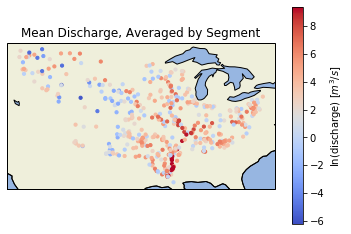

In [18]:
df = pd.read_excel(segmented_frasson_path)
vm.plot_lat_lon_data(df['lat'], df['lon'], df['log_mean_dis'], 'Mean Discharge, Averaged by Segment', r'ln(discharge) $[m^3/s]$')

In [20]:
x_vals_corr = ['log_mean_dis', 'log_max_dis', 'log_min_dis', 'log_QWBM']
y_vals_corr = ['log_sinuosity', 'log_mw','Slope','Width']
dm.perform_correlations(x_vals_corr, y_vals_corr, df)

Correlation Matrix
              log_sinuosity    log_mw     Slope     Width
log_mean_dis      -0.274481  0.393503 -0.418770  0.382419
log_max_dis       -0.258614  0.378489 -0.392924  0.362919
log_min_dis       -0.264874  0.391889 -0.472870  0.398362
log_QWBM          -0.465997  0.698621 -0.540347  0.682199


In [8]:
x_vals_corr = ['log_mean_dis', 'log_max_dis', 'log_min_dis', 'log_QWBM', 'Slope','Width']
y_vals_corr = ['log_sinuosity', 'log_mw']
dm.perform_correlations(x_vals_corr, y_vals_corr, df)

Correlation Matrix
              log_sinuosity    log_mw
log_mean_dis      -0.164834  0.215089
log_max_dis       -0.171180  0.219161
log_min_dis       -0.170070  0.215645
log_QWBM          -0.491770  0.723030
Slope              0.263745 -0.373192
Width             -0.466132  0.773549
